<a href="https://colab.research.google.com/github/NaufalFikriansyah/Klasifikasi-Kendaraan-berdasarkan-Roda/blob/main/Klasifikasi_Roda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#run
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Project/Kendaraan/') #TEMPAT KITA MENYIMPAN DATA DI DRIVE

print(data_dir_list)
path, dirs, files = next(os.walk('/content/drive/MyDrive/Project/Kendaraan/'))

file_count = len(files)
print(file_count)

['Golongan II', 'Golongan V', 'Golongan III', 'Golongan I', 'Golongan IV']
0


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/Project/Kendaraan/' #DATASET ORIGINAL KITA
base_dir = '/content/drive/MyDrive/Project/Kendaraan_Data/' #FOLDER KOSONG YANG MAU KITA BIKIN MENYIMPAN HASIL SPLIT
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir) #MEMBUAT DIRECTORY TRAIN

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir) #MEMBUAT DIRECTORY VALIDATION

#NOTE: Jika directory sudah dibuat atau menemukan error 'file exist' cukup berikan comment '#' pada os.mkdir()

In [ ]:
#Under train folder create five folders 

#membuat folder baru tiap golongan di directory train
train_G1_dir = os.path.join(train_dir, 'Gol1')
os.mkdir(train_G1_dir)

train_G2_dir = os.path.join(train_dir, 'Gol2')
os.mkdir(train_G2_dir)

train_G3_dir = os.path.join(train_dir, 'Gol3')
os.mkdir(train_G3_dir)

train_G4_dir = os.path.join(train_dir, 'Gol4')
os.mkdir(train_G4_dir)

train_G5_dir = os.path.join(train_dir, 'Gol5')
os.mkdir(train_G5_dir)

#Under validation folder create five folders 

#membuat folder baru tiap golongan di directory validation
validation_G1_dir = os.path.join(validation_dir, 'Gol1')
os.mkdir(validation_G1_dir)

validation_G2_dir = os.path.join(validation_dir, 'Gol2')
os.mkdir(validation_G2_dir)

validation_G3_dir = os.path.join(validation_dir, 'Gol3')
os.mkdir(validation_G3_dir)

validation_G4_dir = os.path.join(validation_dir, 'Gol4')
os.mkdir(validation_G4_dir)

validation_G5_dir = os.path.join(validation_dir, 'Gol5')
os.mkdir(validation_G5_dir)


#NOTE: Jika directory sudah dibuat atau menemukan error 'file exist' cukup berikan comment '#' pada os.mkdir()

In [ ]:
#SPLITING DATA
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
G1_SOURCE_DIR = '/content/drive/MyDrive/Project/Kendaraan/Golongan 1/' #Sumber directory yang sudah dibuat
TRAINING_G1_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/Gol1/' #Training directory
VALID_G1_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/Gol1/' #validation directory

G2_SOURCE_DIR = '/content/drive/MyDrive/Project/Kendaraan/Golongan 2/'
TRAINING_G2_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/Gol2/'
VALID_G2_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/Gol2/'


G3_SOURCE_DIR = '/content/drive/MyDrive/Project/Kendaraan/Golongan 3/'
TRAINING_G3_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/Gol3/'
VALID_G3_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/Gol3/'

G4_SOURCE_DIR = '/content/drive/MyDrive/Project/Kendaraan/Golongan 4/'
TRAINING_G4_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/Gol4/'
VALID_G4_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/Gol4/'

G5_SOURCE_DIR = '/content/drive/MyDrive/Project/Kendaraan/Golongan 5/'
TRAINING_G5_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/Gol5/'
VALID_G5_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/Gol5/'


In [ ]:

import os
import numpy as np 
import pandas as pd
import seaborn as sn
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:

import random
from shutil import copyfile

split_size = .80 #SPLITTING DATA MENJADI 80% TRAINING DAN 20% TESTING

split_data(G1_SOURCE_DIR, TRAINING_G1_DIR, VALID_G1_DIR, split_size)
split_data(G2_SOURCE_DIR, TRAINING_G2_DIR, VALID_G2_DIR, split_size)
split_data(G3_SOURCE_DIR, TRAINING_G3_DIR, VALID_G3_DIR, split_size)
split_data(G4_SOURCE_DIR, TRAINING_G4_DIR, VALID_G4_DIR, split_size)
split_data(G5_SOURCE_DIR, TRAINING_G5_DIR, VALID_G5_DIR, split_size)

#NOTE: Kalau sudah pernah dirun di comment semuanya saja

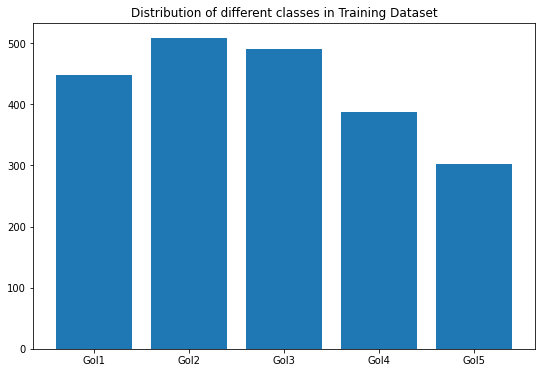

Training Gol1 images are: 448
Training Gol2 images are: 508
Training Gol3 images are: 491
Training Gol4 images are: 387
Training Gol5 images are: 302


In [ ]:
#VISUALISASI DATA TRAINING
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Gol1', 'Gol2', 'Gol3', 'Gol4', 'Gol5']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Project/Kendaraan_Data2/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

for i in ['Gol1', 'Gol2', 'Gol3', 'Gol4', 'Gol5']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Project/Kendaraan_Data2/train/'+i+'/'))))

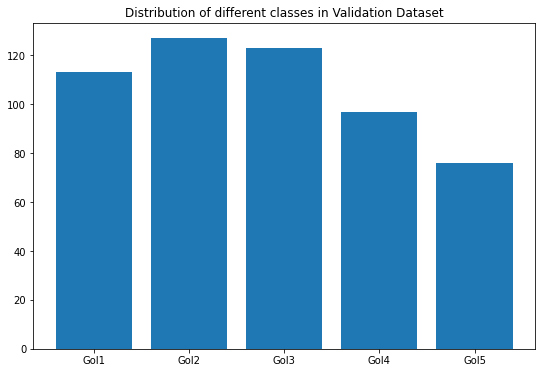

Validation Gol1 images are: 113
Validation Gol2 images are: 127
Validation Gol3 images are: 123
Validation Gol4 images are: 97
Validation Gol5 images are: 76


In [ ]:
#VISUALISASI DATA VALIDATION
image_folder = ['Gol1', 'Gol2', 'Gol3', 'Gol4', 'Gol5']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Project/Kendaraan_Data2/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

for i in ['Gol1', 'Gol2', 'Gol3', 'Gol4', 'Gol5']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Project/Kendaraan_Data2/validation/'+i+'/'))))

In [ ]:

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import itertools
import math 
import datetime
import time


In [ ]:
#MERESIZE UKURAN GAMBAR MENJADI 150 X 150 PIXEL
img_width=150; img_height=150

#BATCH SIZE ADALAH JUMLAH SAMPLE DATA YANG DIAMBIL SETIAP EPOCH
batch_size=32


TRAINING_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/train/'  #DIRECTORY TRAINING



train_datagen = ImageDataGenerator(rescale= 1/255.0,
                                   rotation_range= 30,
                                   zoom_range= 0.2,
                                   shear_range= 0.2,
                                   fill_mode= 'nearest',
                                   horizontal_flip= True
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

VALIDATION_DIR = '/content/drive/MyDrive/Project/Kendaraan_Data/validation/'  #DIRECTORY TRAINING

validation_datagen = ImageDataGenerator(rescale= 1/255.0
                                        )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )


Found 2136 images belonging to 5 classes.
Found 536 images belonging to 5 classes.


In [ ]:

# autosave best Model
best_model_file = '/content/drive/MyDrive/Project/Kendaraan_Data/mybest_model.h5' #DIRECTORY MENYIMPAN FILE MODEL YANG SUDAH DITRAIN NANTINYA
metric = 'val_accuracy'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
input_shape=(img_height, img_width, 3)
#MENGGUNAKAN 2 LAYER KONVOLUSI DAN 2 LAYER POOLING
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape = input_shape, padding = "same"),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 73, 73, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43808)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

start = datetime.datetime.now()
history = model.fit_generator(train_generator,
                              epochs=10, #GANTI JUMLAH EPOCH KALAU MAU. Epoch adalah jumlah iterasi dalam proses training. Semakin besar memungkinkan untuk semakin bagus tapi akan semakin lama
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )


Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 1.6113 - accuracy: 0.2968
Epoch 1: val_accuracy improved from -inf to 0.39179, saving model to /content/drive/MyDrive/Project/Kendaraan_Data2/mybest_model.h5
67/67 [==============================] - 97s 1s/step - loss: 1.6113 - accuracy: 0.2968 - val_loss: 1.3711 - val_accuracy: 0.3918
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 1.2610 - accuracy: 0.4836
Epoch 2: val_accuracy improved from 0.39179 to 0.57463, saving model to /content/drive/MyDrive/Project/Kendaraan_Data2/mybest_model.h5
67/67 [==============================] - 91s 1s/step - loss: 1.2610 - accuracy: 0.4836 - val_loss: 1.1570 - val_accuracy: 0.5746
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 1.1099 - accuracy: 0.5688
Epoch 3: val_accuracy improved from 0.57463 to 0.67351, saving model to /content/drive/MyDrive/Project/Kendaraan_Data2/mybest_model.h5
67/67 [==============================] - 92s 1s/step - los

In [ ]:
(train_loss, train_accuracy) = model.evaluate(
    train_generator, 
    batch_size=batch_size, 
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(train_accuracy * 100)) 
print('[INFO] Loss: {:.2f}%'.format(train_loss)) 
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

67/67 [==============================] - 34s 496ms/step - loss: 0.5878 - accuracy: 0.7800
[INFO] accuracy: 78.00%
[INFO] Loss: 0.59%
Time:  0:17:07.651261


In [ ]:
(val_loss, val_accuracy) = model.evaluate(
    validation_generator, 
    batch_size=batch_size, 
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(val_accuracy * 100)) 
print('[INFO] Loss: {:.2f}%'.format(val_loss)) 
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

17/17 [==============================] - 6s 364ms/step - loss: 0.7350 - accuracy: 0.7481
[INFO] accuracy: 74.81%
[INFO] Loss: 0.74%
Time:  0:17:14.313330


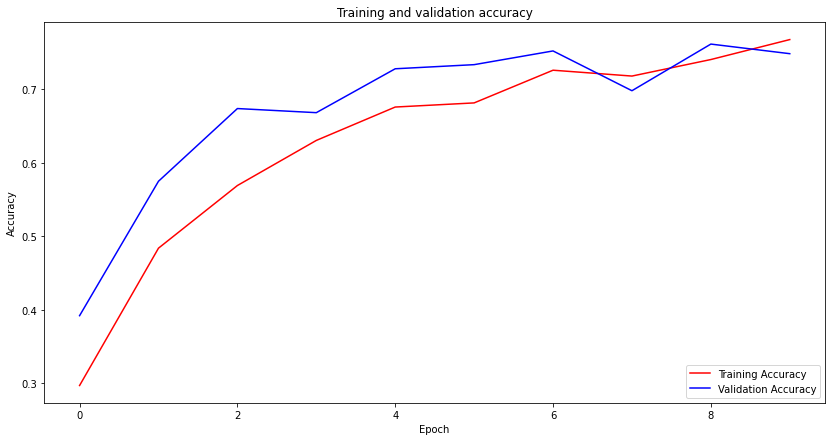

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

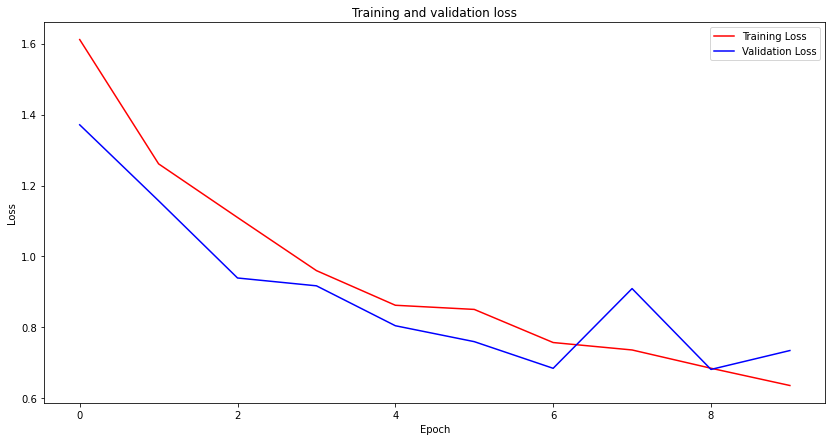

In [ ]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')


========= CONFUSION MATRIX =========
[[19 21 23 30 20]
 [15 32 29 30 21]
 [25 28 17 30 23]
 [20 32 19 16 10]
 [10 16 16 14 20]]
============== RESULT ==============
              precision    recall  f1-score   support

           0       0.21      0.17      0.19       113
           1       0.25      0.25      0.25       127
           2       0.16      0.14      0.15       123
           3       0.13      0.16      0.15        97
           4       0.21      0.26      0.24        76

    accuracy                           0.19       536
   macro avg       0.19      0.20      0.19       536
weighted avg       0.20      0.19      0.19       536

Confusion matrix, without normalization


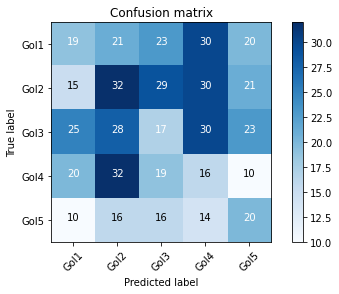

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict_generator(validation_generator)
pred = np.argmax(predict, axis=1)
cm = confusion_matrix(validation_generator.classes,pred)

def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues) :

      if normalize:
          cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] 
          print('Normalized confusion matrix')
   
      else: print('Confusion matrix, without normalization') 
        
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)
 
      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label') 

print("========= CONFUSION MATRIX =========")
print(cm)

print("============== RESULT ==============")
print(classification_report(validation_generator.classes,pred))

plot_confusion_matrix(cm, ['Gol1', 'Gol2', 'Gol3', 'Gol4', 'Gol5'], normalize = False)

Saving 202002287816556_jpg.rf.65229daf1877b6cc1e178b40065d4d71.jpg to 202002287816556_jpg.rf.65229daf1877b6cc1e178b40065d4d71 (2).jpg
1/1 [==============================] - 0s 64ms/step
202002287816556_jpg.rf.65229daf1877b6cc1e178b40065d4d71.jpg
[[0.15296549 0.29400396 0.08772875 0.00168113 0.46362057]]
Golongan5


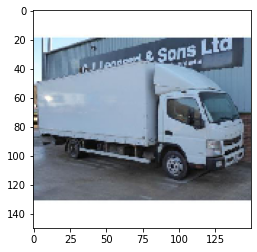

In [ ]:
import keras.utils as image
#UPLOAD GAMBAR UNTUK EVALUASI
%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
       path = fn
       img = image.load_img(path, target_size=(150,150))
       imgplot = plt.imshow(img)
       x = image.img_to_array(img)
       x = np.expand_dims(x, axis=0)
       x = x/255
       images = np.vstack([x])
       classes = model.predict(images, batch_size=32)

       print(fn)
       print(classes)
       if np.argmax(classes[0]) == 0:
         print('Golongan1')
         
       elif np.argmax(classes[0]) == 1:
        print('Golongan2')
        
       elif np.argmax(classes[0]) == 2:
        print('Golongan3')
       
       elif np.argmax(classes[0]) == 3:
        print('Golongan4')
        
       else:
          print('Golongan5')

